In [1]:
import numpy as np
import sys
sys.path.append('..')
from nn import *
from tools import train_test_split, one_hot_encoder
from viz import plot_history

In [2]:
data = np.load('datasets/cifar10.npz')
X = data['arr_0']
y = data['arr_1']
X = X.astype(np.float32) / 255.
y, _ = one_hot_encoder(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
np.random.seed(42)
m = NeuralNetwork('crossentropy', optimizer=Adam(lr=0.01), verbose=True, verbose_step=1, debug=True)
m.add(Flatten())
# m.add(Dense(256, 'elu'))
# m.add(BatchNorm())
m.add(Dense(10, 'softmax', weights_regularizer=L2Regularizer(lamd=1)))
h = m.fit(X_train, y_train, X_test, y_test, n_epochs=6, batch_size=256, metrics=['accuracy'])

../activations.py:180: RuntimeWarning: invalid value encountered in true_divide
  return (npv.T / npv.sum(axis=1)).T


= loss is nan on epoch 1 | step 99
= loss is nan on epoch 1 | step 100
= loss is nan on epoch 1 | step 101
= loss is nan on epoch 1 | step 102
= loss is nan on epoch 1 | step 103
= loss is nan on epoch 1 | step 104
= loss is nan on epoch 1 | step 105
= loss is nan on epoch 1 | step 106
= loss is nan on epoch 1 | step 107
= loss is nan on epoch 1 | step 108
= loss is nan on epoch 1 | step 109
= loss is nan on epoch 1 | step 110
= loss is nan on epoch 1 | step 111
= loss is nan on epoch 1 | step 112
= loss is nan on epoch 1 | step 113
= loss is nan on epoch 1 | step 114
= loss is nan on epoch 1 | step 115
= loss is nan on epoch 1 | step 116
= loss is nan on epoch 1 | step 117
= loss is nan on epoch 1 | step 118
= loss is nan on epoch 1 | step 119
= loss is nan on epoch 1 | step 120
= loss is nan on epoch 1 | step 121
= loss is nan on epoch 1 | step 122
= loss is nan on epoch 1 | step 123
= loss is nan on epoch 1 | step 124
= loss is nan on epoch 1 | step 125
= loss is nan on epoch 1 | st

KeyboardInterrupt: 

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Softmax, Flatten
from keras.optimizers import Adam

In [9]:
km = Sequential([Flatten(), Dense(10), Softmax()])
km.compile('adam', 'categorical_crossentropy')
km.fit(X_train, y_train, batch_size=256)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1
37500/37500 [==============================] - 1s 27us/step - loss: 1.9894


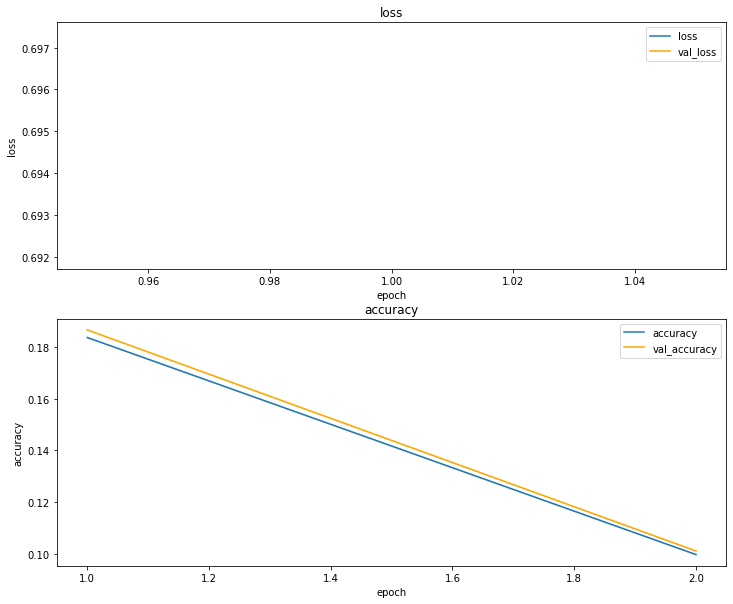

In [5]:
plot_history(h)

In [6]:
np.random.seed(42)
m = NeuralNetwork('crossentropy', optimizer=Adam(lr=0.001), verbose=True, verbose_step=1, debug=True)
m.add(Flatten())
m.add(Dense(256, 'elu'))
m.add(BatchNorm())
m.add(Dense(256, 'elu'))
m.add(BatchNorm())
m.add(Dense(10, 'softmax'))
h = m.fit(X_train, y_train, X_test, y_test, n_epochs=3, batch_size=32, metrics=['accuracy'])

step=0|running loss=0.02328|W=0.18045|b=0.00309|grad=[0.19116882641940997, 0.017201378582780685]
step=1|running loss=0.04348|W=0.18082|b=0.00525|grad=[0.20749064672514575, 0.021793374537251498]
step=2|running loss=0.06210|W=0.18252|b=0.00626|grad=[0.36472020675368316, 0.024566163946364364]
step=3|running loss=0.07664|W=0.18877|b=0.00704|grad=[0.1587694665359094, 0.013067636689565572]
step=4|running loss=0.09077|W=0.19541|b=0.00755|grad=[0.25372939962173413, 0.02110998074182702]
step=5|running loss=0.10343|W=0.20092|b=0.00780|grad=[0.3372474901954818, 0.025025027646050232]
step=6|running loss=0.11550|W=0.20516|b=0.00822|grad=[0.407980682741046, 0.030288595319365428]
step=7|running loss=0.12516|W=0.20867|b=0.00855|grad=[0.28818304816187673, 0.03089972712902763]
step=8|running loss=0.13425|W=0.21231|b=0.00914|grad=[0.2329778988765498, 0.019771342558412144]
step=9|running loss=0.14103|W=0.21662|b=0.00960|grad=[0.24235532935435425, 0.016511645691117485]
step=10|running loss=0.14755|W=0.2205

KeyboardInterrupt: 

In [ ]:
plot_history(h)